# Waddington-OT Analysis of embryogenesis of CNS of Drosophila Melanogaster

In [1]:
import scanpy as sc
import anndata 
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [19]:
#umap_coords = pd.read_csv('/wot_input_new_D_melanogaster/umap_coords.txt', sep='\t', index_col=0)
#var_ds = sc.read_h5ad('/wot_input_new_D_melanogaster/var_genes_matrix.h5ad')
#cell_days = pd.read_csv('/wot_input_new_D_melanogaster/cell_days.txt')

In [18]:
#adata = sc.read_h5ad('/wot_input_new_D_melanogaster/expression_matrix.h5ad')

#### Data Visualization

In [11]:
print(umap_coords.head())

                            UMAP1     UMAP2
s12_AAACCCACACCAGCTG-1  11.536319  3.997698
s12_AAACCCACACCATAAC-1  11.858620  3.528577
s12_AAACCCAGTATCCCTC-1  19.645079 -2.636617
s12_AAACCCAGTGCATGTT-1  14.167144 -0.880442
s12_AAACCCAGTTTAGAGA-1   9.834386 -0.655401


In [12]:
print(f"Shape: {umap_coords.shape}")

Shape: (39307, 2)


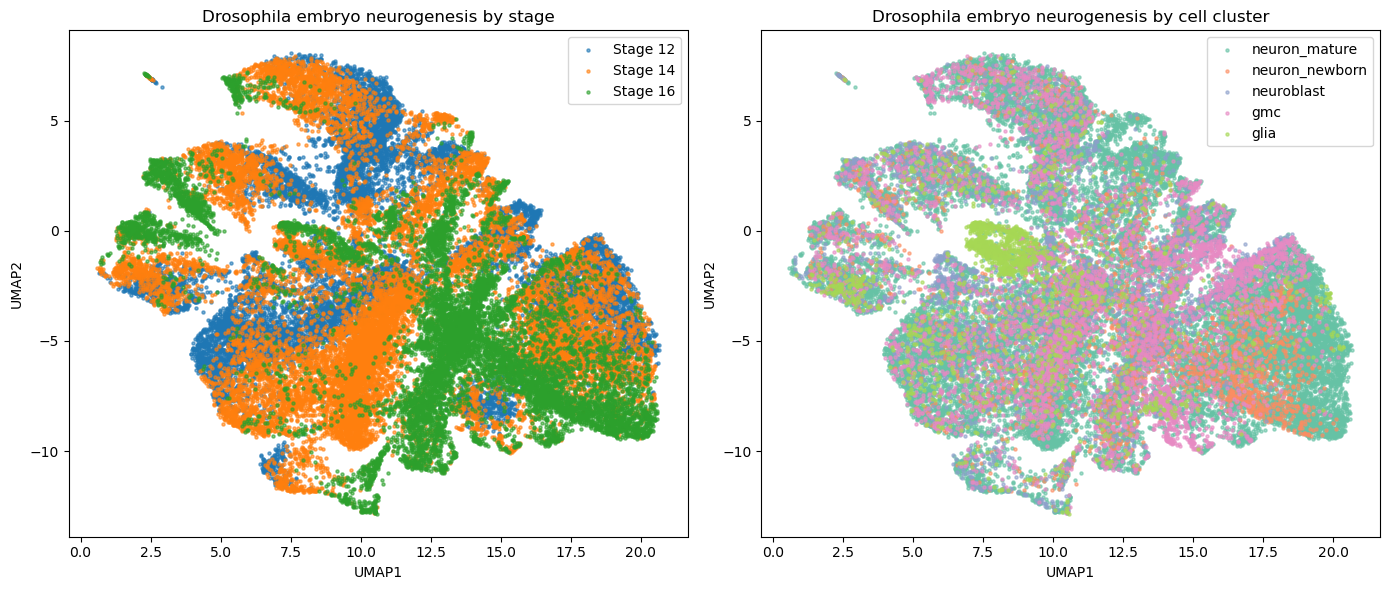

In [16]:
# Generating UMAP of cell states
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot colored by developmental stage
ax1 = axes[0]
for stage in sorted(adata.obs['day'].unique()):
    mask = adata.obs['day'] == stage
    cells = adata.obs_names[mask]
    coords = umap_coords.loc[cells]
    ax1.scatter(coords['UMAP1'], coords['UMAP2'], 
               label=f'Stage {stage}', s=5, alpha=0.6)

ax1.set_xlabel('UMAP1')
ax1.set_ylabel('UMAP2')
ax1.set_title('Drosophila embryo neurogenesis by stage')
ax1.legend()

# Plot colored by neural cell type
ax2 = axes[1]
cell_types = adata.obs['neural_cell_type'].unique()
colors = plt.cm.Set2(range(len(cell_types)))

for ct, color in zip(cell_types, colors):
    mask = adata.obs['neural_cell_type'] == ct
    cells = adata.obs_names[mask]
    coords = umap_coords.loc[cells]
    ax2.scatter(coords['UMAP1'], coords['UMAP2'], 
               label=ct, s=5, alpha=0.6, color=color)

ax2.set_xlabel('UMAP1')
ax2.set_ylabel('UMAP2')
ax2.set_title('Drosophila embryo neurogenesis by cell cluster')
ax2.legend()

plt.tight_layout()
plt.savefig('umap_visualization.png', dpi=300)
plt.show()

In [20]:
import wot

#### Computing Transport Matrices

In [ ]:
ot_model = wot.ot.OTModel(adata, day_field

In [24]:
# adata_hvg has highly variable genes

adata_full = adata
adata_hvg = var_ds

print(f"Full matrix: {adata_full.n_obs} cells × {adata_full.n_vars} genes")
print(f"HVG matrix:  {adata_hvg.n_obs} cells × {adata_hvg.n_vars} genes")

Full matrix: 39307 cells × 14163 genes
HVG matrix:  39307 cells × 2000 genes


In [23]:
data_dir = 'transport_maps_D_melanogaster/'
os.makedirs(f'{data_dir}tmaps', exist_ok=True)

In [25]:
print(f"Dataset: {adata_hvg.n_obs} cells × {adata_hvg.n_vars} genes")
print(f"\nCells per stage:")
print(adata_hvg.obs['day'].value_counts().sort_index())

Dataset: 39307 cells × 2000 genes

Cells per stage:
day
12    12848
14    16116
16    10343
Name: count, dtype: int64


In [26]:
adata_hvg.obs['day'] = pd.to_numeric(adata_hvg.obs['day'])

In [27]:
#Initializing OT Model

ot_model = wot.ot.OTModel(
    adata,
    day_field='day',
    epsilon=0.05,       # Entropy regularization
    lambda1=1,          # Unbalanced transport parameter
    lambda2=50          # Growth constraint parameter
)

In [28]:
# Computing Transport Maps

ot_model.compute_all_transport_maps(tmap_out=f'{data_dir}tmaps/tmap')

In [30]:
files = os.listdir('transport_maps_D_melanogaster/tmaps')
print(f"Number of files: {len(files)}")
for f in files:
    print(f)

Number of files: 2
tmap_14_16.h5ad
tmap_12_14.h5ad


#### Computing Long Range Couplings

In [37]:
#tmap_model = wot.tmap.TransportMapModel.from_directory('/transport_maps_D_melanogaster/tmaps/tmap')

In [39]:
print(adata_hvg.obs.columns)

Index(['day', 'stage', 'original_barcode', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes',
       'n_neuro_markers', 'is_neurogenesis', 'neural_cell_type'],
      dtype='object')


In [40]:
print(adata_hvg.obs['stage'].value_counts())

stage
stage14    16116
stage12    12848
stage16    10343
Name: count, dtype: int64


In [136]:
print(adata_hvg.obs['is_neurogenesis'].value_counts())

is_neurogenesis
True    39307
Name: count, dtype: int64


In [41]:
print(adata_hvg.obs['day'].value_counts())

day
14    16116
12    12848
16    10343
Name: count, dtype: int64


In [42]:
print(adata_hvg.obs['neural_cell_type'].value_counts())

neural_cell_type
neuron_mature     26196
gmc                5261
neuroblast         3075
neuron_newborn     2755
glia               2020
Name: count, dtype: int64


In [43]:
#Getting Cells at final stage/day

stage_16_mask = adata_hvg.obs['day'] == 16
adata_16 = adata_hvg[stage_16_mask]

In [44]:
print("Cell types at stage 16:")
print(adata_16.obs['neural_cell_type'].value_counts())

Cell types at stage 16:
neural_cell_type
neuron_mature     6435
neuron_newborn    1386
gmc               1351
neuroblast         768
glia               403
Name: count, dtype: int64


In [45]:
data_dir = 'wot_input_new_D_melanogaster/'

In [46]:
with open(f'{data_dir}cell_sets.gmt', 'w') as f:
    for cell_type in adata_16.obs['neural_cell_type'].unique():
        # Get cells of this type at stage 16
        mask = adata_16.obs['neural_cell_type'] == cell_type
        cells = adata_16.obs_names[mask].tolist()
        
        if len(cells) >= 10:  # Only include if enough cells
            # GMT format: name <tab> description <tab> cell1 <tab> cell2 <tab> ...
            f.write(f"{cell_type}\t{cell_type}\t" + "\t".join(cells) + "\n")
            print(f"  {cell_type}: {len(cells)} cells")

print(f"\nSaved to {data_dir}cell_sets.gmt")

  neuron_mature: 6435 cells
  neuron_newborn: 1386 cells
  gmc: 1351 cells
  neuroblast: 768 cells
  glia: 403 cells

Saved to wot_input_new_D_melanogaster/cell_sets.gmt


#### Inferring Ancestors and Descendants

In [47]:
# Cell sets for all cells of each type (all timepoints
with open(f'{data_dir}cell_sets_all_stages.gmt', 'w') as f:
    for cell_type in adata_hvg.obs['neural_cell_type'].unique():
        mask = adata_hvg.obs['neural_cell_type'] == cell_type
        cells = adata_hvg.obs_names[mask].tolist()
        
        if len(cells) >= 10:
            f.write(f"{cell_type}\t{cell_type}\t" + "\t".join(cells) + "\n")
            print(f"{cell_type}: {len(cells)} cells")

print(f"\nSaved to {data_dir}cell_sets_all_stages.gmt")

neuron_mature: 26196 cells
neuron_newborn: 2755 cells
neuroblast: 3075 cells
gmc: 5261 cells
glia: 2020 cells

Saved to wot_input_new_D_melanogaster/cell_sets_all_stages.gmt


In [53]:
#cell_sets = wot.io.read_sets('/wot_input_new_D_melanogaster/cell_sets.gmt', as_dict=True)

In [54]:
print("Cell sets:", cell_sets.keys())

Cell sets: dict_keys(['neuron_mature', 'neuron_newborn', 'gmc', 'neuroblast', 'glia'])


In [57]:
populations = tmap_model.population_from_cell_sets(cell_sets, at_time=16)
print("Populations:", populations)

# Compute trajectories (ancestors and descendants)
trajectory_ds = tmap_model.trajectories(populations)
print(trajectory_ds)

Populations: [<wot.population.Population object at 0x7f993f65b230>, <wot.population.Population object at 0x7f993ce80050>, <wot.population.Population object at 0x7f993ce80550>, <wot.population.Population object at 0x7f997ffc0b00>, <wot.population.Population object at 0x7f997ffc0180>]
AnnData object with n_obs × n_vars = 39307 × 5
    obs: 'day'


In [59]:
for cell_set_name in cell_sets.keys():
    # Initialize column
    adata_hvg.obs[f'traj_{cell_set_name}'] = 0.0
    
    # Get trajectory probabilities for this cell set
    for i, timepoint in enumerate(trajectory_ds.obs['day'].unique()):
        traj_at_t = trajectory_ds[trajectory_ds.obs['day'] == timepoint]
        if cell_set_name in traj_at_t.var_names:
            probs = traj_at_t[:, cell_set_name].X.flatten()
            cell_ids = traj_at_t.obs_names
            
            for cell_id, prob in zip(cell_ids, probs):
                if cell_id in adata_hvg.obs_names:
                    adata_hvg.obs.loc[cell_id, f'traj_{cell_set_name}'] = prob

In [61]:
# Checking available trajectory columns
traj_cols = [col for col in adata_hvg.obs.columns if col.startswith('traj_')]
print("Available trajectory columns:")
for col in traj_cols:
    print(f"  '{col}'")

# Checking cell_sets keys
print("\nCell sets keys:")
for key in cell_sets.keys():
    print(f"  '{key}'")

Available trajectory columns:
  'traj_neuron_mature'
  'traj_neuron_newborn'
  'traj_gmc'
  'traj_neuroblast'
  'traj_glia'

Cell sets keys:
  'neuron_mature'
  'neuron_newborn'
  'gmc'
  'neuroblast'
  'glia'


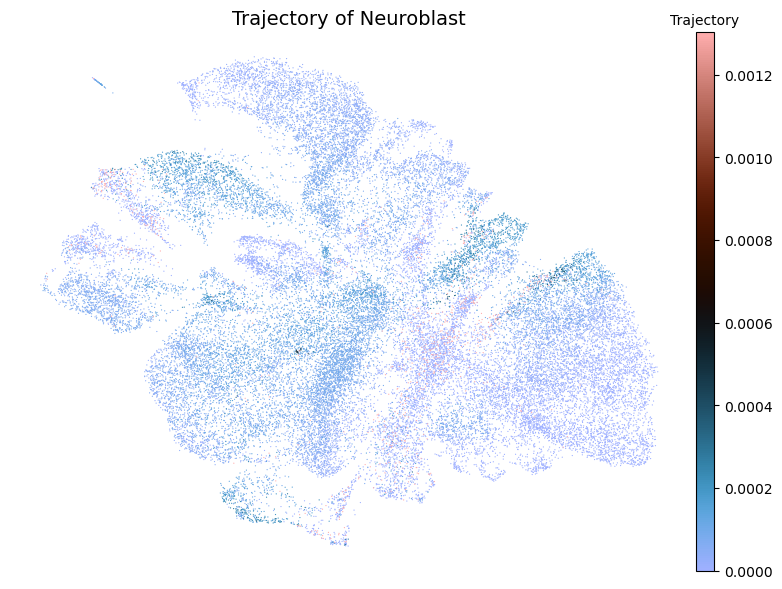

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.umap(adata_hvg, color=['traj_neuroblast'], ax=ax, show=False, frameon=False, cmap = 'berlin')

# Get colorbar and add title on top
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Trajectory', fontsize=10)

plt.title('Trajectory of Neuroblast', fontsize=14)
plt.tight_layout()
plt.savefig('Neuroblast.png', dpi=300, bbox_inches='tight')
plt.show()

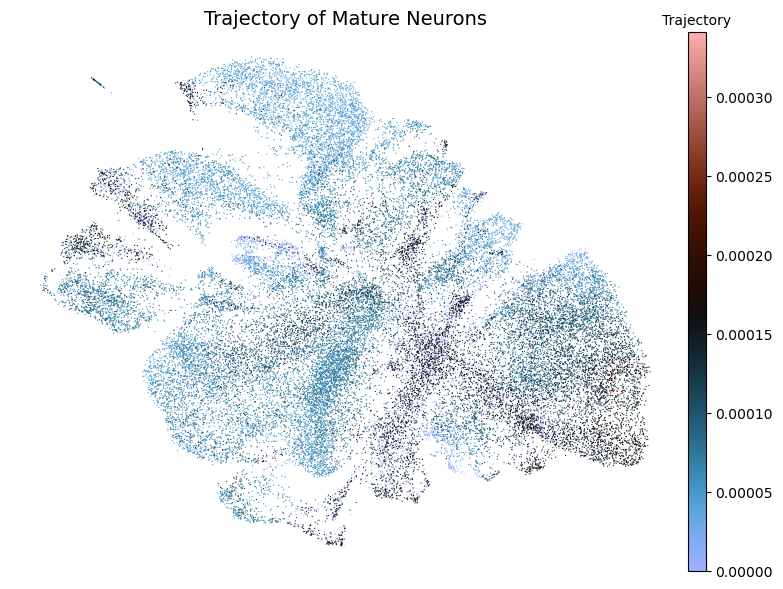

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.umap(adata_hvg, color=['traj_neuron_mature'], ax=ax, show=False, frameon=False, cmap = 'berlin')

# Get colorbar and add title on top
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Trajectory', fontsize=10)

plt.title('Trajectory of Mature Neurons', fontsize=14)
plt.tight_layout()
plt.savefig('Mature_Neurons.png', dpi=300, bbox_inches='tight')
plt.show()

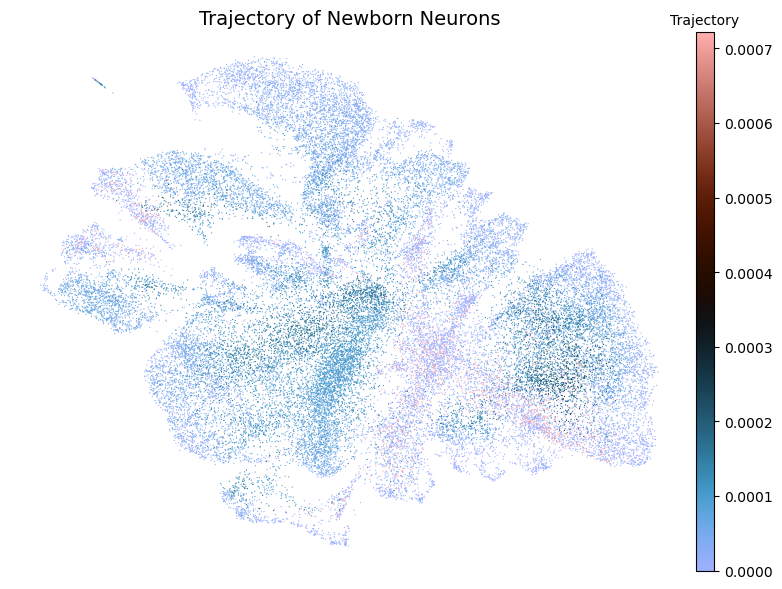

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.umap(adata_hvg, color=['traj_neuron_newborn'], ax=ax, show=False, frameon=False, cmap = 'berlin')

# Get colorbar and add title on top
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Trajectory', fontsize=10)

plt.title('Trajectory of Newborn Neurons', fontsize=14)
plt.tight_layout()
plt.savefig('Newborn_Neurons.png', dpi=300, bbox_inches='tight')
plt.show()

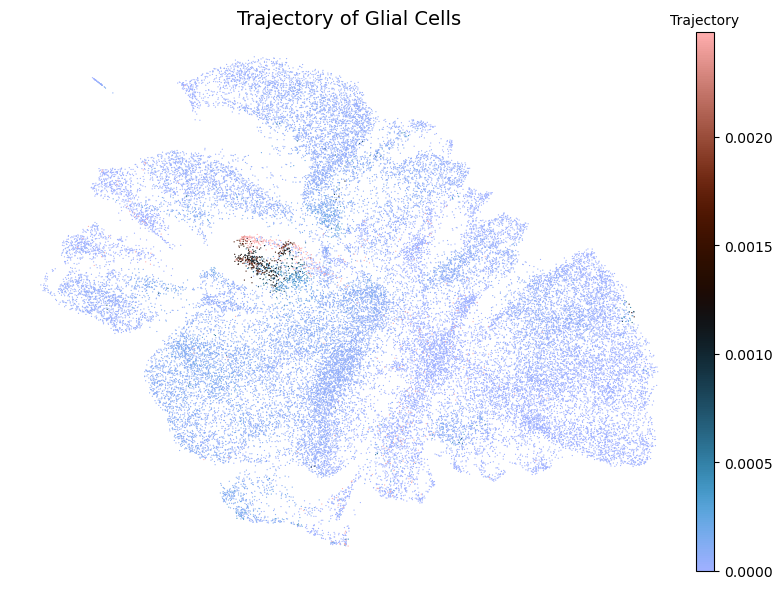

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.umap(adata_hvg, color=['traj_glia'], ax=ax, show=False, frameon=False, cmap = 'berlin')

# Get colorbar and add title on top
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Trajectory', fontsize=10)

plt.title('Trajectory of Glial Cells', fontsize=14)
plt.tight_layout()
plt.savefig('Glia.png', dpi=300, bbox_inches='tight')
plt.show()

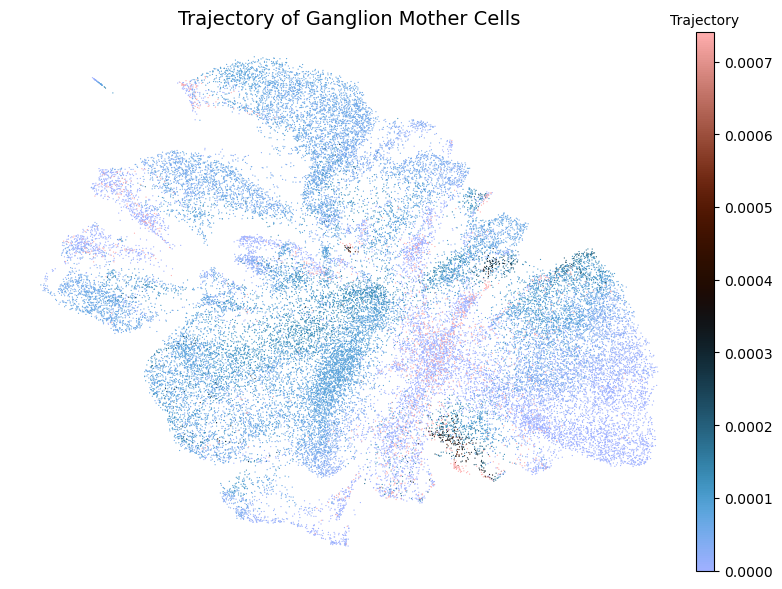

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.umap(adata_hvg, color=['traj_gmc'], ax=ax, show=False, frameon=False, cmap = 'berlin')

# Get colorbar and add title on top
cbar = ax.collections[0].colorbar
cbar.ax.set_title('Trajectory', fontsize=10)

plt.title('Trajectory of Ganglion Mother Cells', fontsize=14)
plt.tight_layout()
plt.savefig('GMC.png', dpi=300, bbox_inches='tight')
plt.show()

#### Analyzing Trajectory Trends

In [74]:
#Computing trends across genes

trajectory_trends = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds, adata_hvg)

In [75]:
# Saving each trajectory in separate file
output_dir = 'trajectory_results'
os.makedirs(output_dir, exist_ok=True)

# Save each trajectory in the directory
for i in range(len(trajectory_trends)):
    filename = os.path.join(output_dir, trajectory_ds.var.index[i] + '_trends.txt')
    wot.io.write_dataset(trajectory_trends[i], filename)
    print(f"Saved: {filename}")

Saved: trajectory_results/neuron_mature_trends.txt
Saved: trajectory_results/neuron_newborn_trends.txt
Saved: trajectory_results/gmc_trends.txt
Saved: trajectory_results/neuroblast_trends.txt
Saved: trajectory_results/glia_trends.txt


In [77]:
trajectory_trend_datasets = []
trajectory_names = []

# Definining directory where trends are saved
#trends_dir = '/wot_input_new_D_melanogaster/trajectory_results'  

# List available trend files
trend_files = [f for f in os.listdir(trends_dir) if f.endswith('_trends.txt')]
print("Available trend files:")
for f in trend_files:
    print(f"  {f}")

# Load all trajectory trends
trajectory_trend_datasets = []
trajectory_names = []

for f in trend_files:
    filepath = os.path.join(trends_dir, f)
    trend_ds = wot.io.read_dataset(filepath)
    trajectory_trend_datasets.append(trend_ds)
    name = f.replace('_trends.txt', '')
    trajectory_names.append(name)
    print(f"Loaded: {name}")

Available trend files:
  gmc_trends.txt
  neuron_newborn_trends.txt
  neuron_mature_trends.txt
  neuroblast_trends.txt
  glia_trends.txt
Loaded: gmc
Loaded: neuron_newborn
Loaded: neuron_mature
Loaded: neuroblast
Loaded: glia


In [78]:
print("\nFirst 50 genes:")
print(trajectory_trend_datasets[0].var.index[:50].tolist())


First 50 genes:
['spok', 'CG42402', 'CG14636', 'CG31516', 'CG34305', 'TwdlU', 'TwdlF', 'TwdlG', 'TwdlV', 'CG1092', 'cpx', 'hkb', 'Nep2', 'opa', 'CG2016', 'CG1124', 'CG14662', 'lncRNA:CR46352', 'CG43131', '7B2', 'CG2663', 'Nmdar1', 'cas', 'CG1213', 'side-III', 'CG10280', 'Gasp', 'Obp83cd', 'Obp83g', 'Osi24', 'Osi2', 'Osi3', 'Osi6', 'Osi7', 'Osi9', 'Osi12', 'CG15594', 'Osi13', 'Osi14', 'Osi15', 'Osi16', 'Osi17', 'Osi18', 'Osi19', 'Osi20', 'CG17919', 'Neurochondrin', 'Ass', 'lab', 'Ccp84Ag']


In [98]:
# Finding known genes
recognizable = [g for g in available_genes 
                if not g.startswith('CG') and not g.startswith('Osi')]
print(f"Recognizable gene names: {len(recognizable)}")
print(recognizable[:50])

# 2. Selecting known genes in neurogenesis
genes_to_use = [
    # From your dataset that I can see in the image
    'spok', 'hkb', 'cas', 'Neurochondrin',
    # Add the neurogenesis genes that exist
    'dpn', 'mira', 'wor', 'ase', 'pros', 'tap',  # Neuroblast/GMC
    'elav', 'nSyb', 'brp',  # Neurons
    'repo', 'gcm',  # Glia
    'N', 'Dl',  # Notch
    'hh', 'wg', 'dpp',  # Signaling
    'en', 'vnd', 'ind', 'msh',  # Patterning
    'SoxN', 'Dichaete',  # Sox genes
]

found_genes, _ = find_gene_matches(genes_to_use, available_genes)
final_gene_list = list(found_genes.values())

print(f"\nFinal gene list ({len(final_gene_list)} genes):")
print(final_gene_list)

Recognizable gene names: 1140
['spok', 'TwdlU', 'TwdlF', 'TwdlG', 'TwdlV', 'cpx', 'hkb', 'Nep2', 'opa', 'lncRNA:CR46352', '7B2', 'Nmdar1', 'cas', 'side-III', 'Gasp', 'Obp83cd', 'Obp83g', 'Neurochondrin', 'Ass', 'lab', 'Ccp84Ag', 'Ccp84Ad', 'Ccp84Ac', 'lncRNA:CR33938', 'Ccp84Ab', 'Ccp84Aa', 'pb', 'bcd', 'Ama', 'Dfd', 'lncRNA:CR42651', 'Scr', 'lncRNA:CR45902', 'lncRNA:CR44932', 'Antp', 'lncRNA:CR45899', 'Sodh-1', 'lncRNA:CR45906', 'Fer1', 'sas', 'Gld', 'Syt4', 'rn', 'lncRNA:CR44333', 'Nlg3', 'Sp7', 'lncRNA:CR46127', 'dsx', 'mAChR-B', 'grn']

Final gene list (21 genes):
['spok', 'hkb', 'cas', 'Neurochondrin', 'dpn', 'mira', 'wor', 'DNaseII', 'pros', 'tap', 'brp', 'repo', 'gcm', 'Nep2', 'Dl', 'hh', 'wg', 'dpp', 'en', 'ind', 'SoxN']


In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [95]:
def get_variable_genes(trajectory_trend_datasets, exclude_genes=[], n_top=30, min_mean=0.1):
    """Get top variable genes not already in our list."""
    
    all_genes = trajectory_trend_datasets[0].var.index.tolist()
    
    variability = {}
    for gene in all_genes:
        if gene in exclude_genes:
            continue
        # Skip CG genes if we have enough named genes
        # if gene.startswith('CG'):
        #    continue
            
        all_values = []
        for traj_ds in trajectory_trend_datasets:
            if gene in traj_ds.var_names:
                all_values.extend(traj_ds[:, gene].X.flatten())
        
        if all_values:
            values = np.array(all_values)
            mean_val = np.mean(values)
            if mean_val > min_mean:
                variability[gene] = np.std(values) / mean_val
    
    sorted_genes = sorted(variability.items(), key=lambda x: x[1], reverse=True)
    return [g[0] for g in sorted_genes[:n_top]]

# Get additional variable genes
existing_genes = list(found_genes.values())
additional_genes = get_variable_genes(trajectory_trend_datasets, 
                                      exclude_genes=existing_genes, 
                                      n_top=30)

print(f"\nTop variable genes to add:")
print(additional_genes)

# Combine gene lists
final_gene_list = list(found_genes.values()) + additional_genes
print(f"\nTotal genes for heatmap: {len(final_gene_list)}")


Top variable genes to add:
['CG3168', 'Rdl', 'CG11426', 'nAChRalpha5', 'para', 'CG32032', 'slo', 'jus', 'Rim', 'dysc', 'IA-2', 'CG13049', 'CG7781', 'Cpr64Ad', 'Ccp84Ag', 'CG42587', 'Sh', 'TwdlW', 'Cpr65Ea', 'ftz-f1', 'cac', 'CG17127', 'TwdlG', 'Mf', 'zyd', 'Tsp29Fb', 'Syt1', 'Ipod', 'CG2962', 'CG14257']

Total genes for heatmap: 51


In [96]:
final_gene_list[1:10]

['hkb', 'cas', 'Neurochondrin', 'dpn', 'mira', 'wor', 'DNaseII', 'pros', 'tap']

In [97]:
def build_expression_matrix(trajectory_trend_datasets, trajectory_names, gene_list):
    """Build expression matrix for clustering."""
    
    timepoints = trajectory_trend_datasets[0].obs.index.values.astype(float)
    
    expression_data = {}
    
    for gene in gene_list:
        expression_data[gene] = {}
        
        for traj_idx, traj_name in enumerate(trajectory_names):
            traj_ds = trajectory_trend_datasets[traj_idx]
            
            if gene in traj_ds.var_names:
                values = traj_ds[:, gene].X.flatten()
                
                for t, v in zip(timepoints, values):
                    # Simplify trajectory name
                    short_name = traj_name.replace('_', ' ')
                    col_name = f"{short_name}_{int(t)}"
                    expression_data[gene][col_name] = v
    
    # Create DataFrame
    df = pd.DataFrame(expression_data).T
    df = df.dropna(how='all')
    df = df.loc[(df != 0).any(axis=1)]
    
    # Z-score normalize each gene (row)
    df_zscore = df.apply(lambda x: (x - x.mean()) / x.std() if x.std() > 0 else x, axis=1)
    df_zscore = df_zscore.fillna(0)
    
    return df_zscore

# Build the matrix
expr_matrix = build_expression_matrix(trajectory_trend_datasets, trajectory_names, final_gene_list)
print(f"Expression matrix shape: {expr_matrix.shape}")
print(f"Genes: {expr_matrix.shape[0]}, Conditions: {expr_matrix.shape[1]}")

Expression matrix shape: (51, 15)
Genes: 51, Conditions: 15


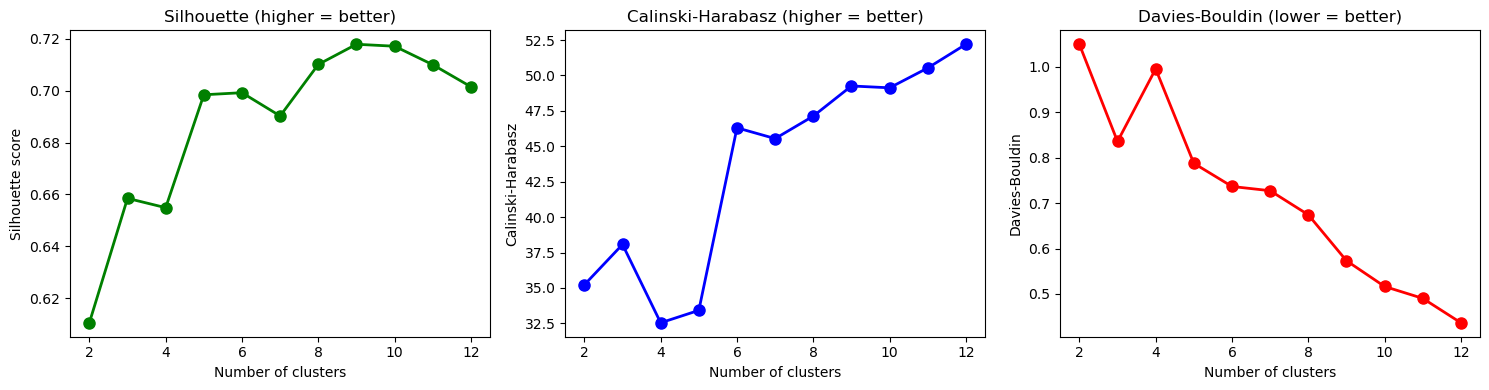


Recommendations:
  Silhouette: k = 9
  Calinski-Harabasz: k = 12
  Davies-Bouldin: k = 12


In [99]:
# Evaluating optimal cluster numbers
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clusters(df_zscore, max_k=12):
    """Evaluate different numbers of clusters."""
    
    dist_matrix = pdist(df_zscore.values, metric='correlation')
    Z = linkage(dist_matrix, method='ward')
    
    k_range = range(2, max_k + 1)
    
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    
    for k in k_range:
        labels = fcluster(Z, k, criterion='maxclust')
        
        sil = silhouette_score(df_zscore.values, labels, metric='correlation')
        silhouette_scores.append(sil)
        
        ch = calinski_harabasz_score(df_zscore.values, labels)
        calinski_scores.append(ch)
        
        db = davies_bouldin_score(df_zscore.values, labels)
        davies_bouldin_scores.append(db)
    
    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of clusters')
    axes[0].set_ylabel('Silhouette score')
    axes[0].set_title('Silhouette (higher = better)')
    
    axes[1].plot(k_range, calinski_scores, 'bo-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Number of clusters')
    axes[1].set_ylabel('Calinski-Harabasz')
    axes[1].set_title('Calinski-Harabasz (higher = better)')
    
    axes[2].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
    axes[2].set_xlabel('Number of clusters')
    axes[2].set_ylabel('Davies-Bouldin')
    axes[2].set_title('Davies-Bouldin (lower = better)')
    
    plt.tight_layout()
    plt.savefig('wot_input_new_D_melanogaster/cluster_evaluation.png', dpi=300)
    plt.show()
    
    # Print recommendations
    best_sil = list(k_range)[np.argmax(silhouette_scores)]
    best_ch = list(k_range)[np.argmax(calinski_scores)]
    best_db = list(k_range)[np.argmin(davies_bouldin_scores)]
    
    print(f"\nRecommendations:")
    print(f"  Silhouette: k = {best_sil}")
    print(f"  Calinski-Harabasz: k = {best_ch}")
    print(f"  Davies-Bouldin: k = {best_db}")
    
    return Z

linkage_matrix = evaluate_clusters(expr_matrix, max_k=12)

Saved to wot_input_new_D_melanogaster/gene_modules_heatmap_k6_v2.png


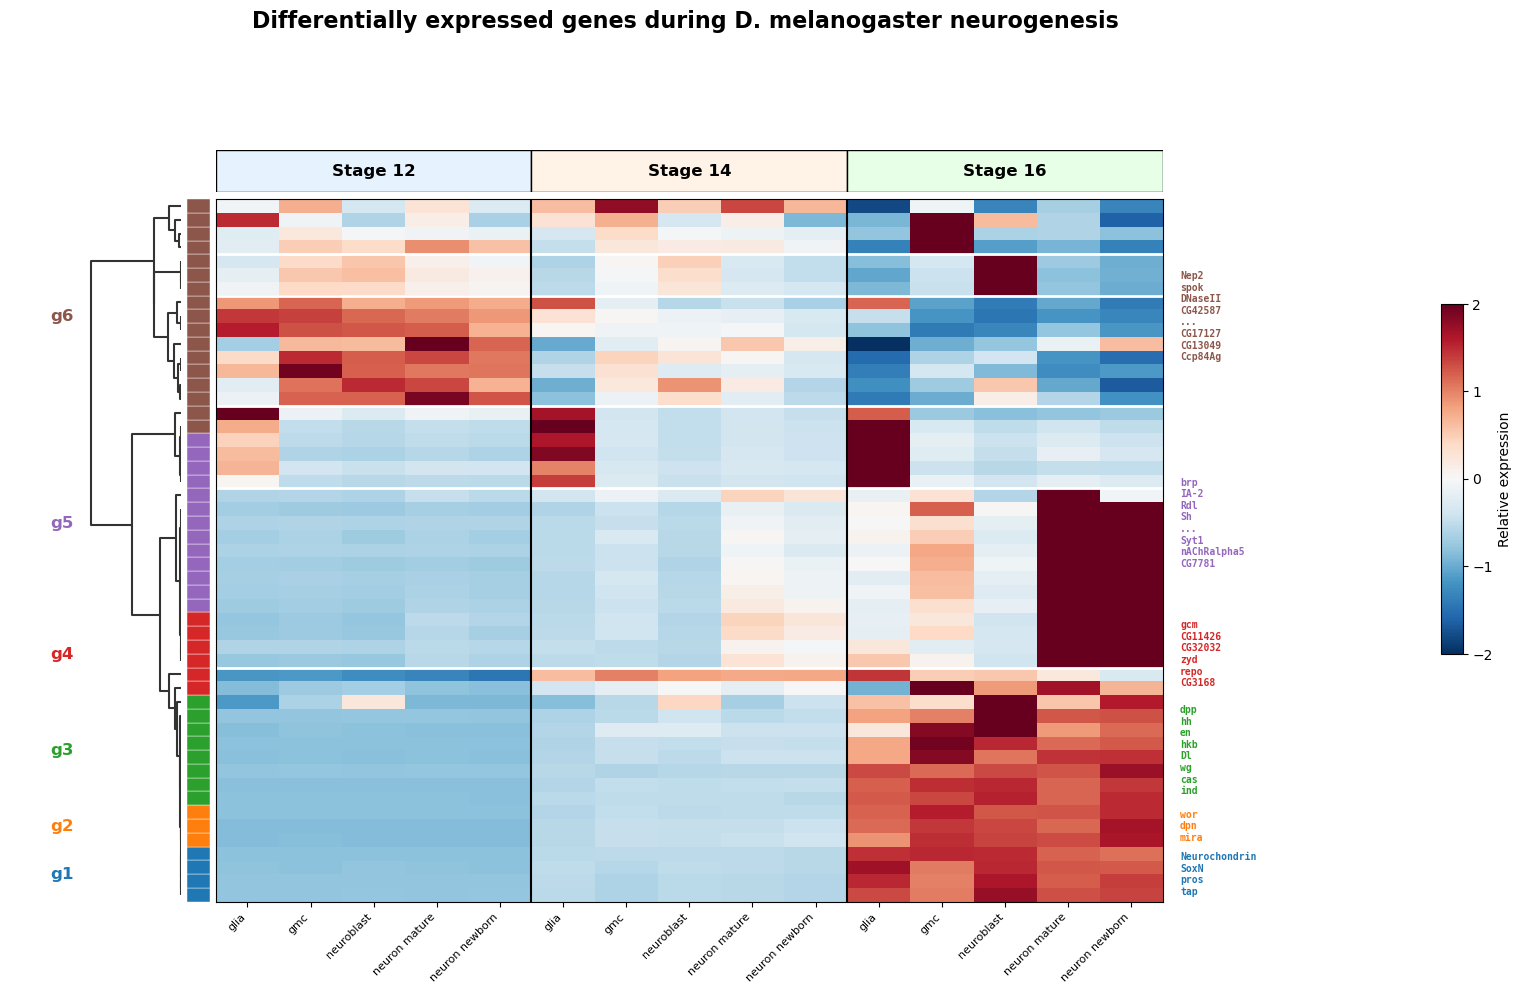


CLUSTER CONTENTS

g1 (4 genes):
  Neurochondrin, pros, tap, SoxN

g2 (3 genes):
  dpn, mira, wor

g3 (8 genes):
  hkb, cas, Dl, hh, wg, dpp, en, ind

g4 (6 genes):
  repo, gcm, CG3168, CG11426, CG32032, zyd

g5 (13 genes):
  brp, Rdl, nAChRalpha5, para, slo, jus, Rim, dysc, IA-2, CG7781, Sh, cac, Syt1

g6 (17 genes):
  spok, DNaseII, Nep2, CG13049, Cpr64Ad, Ccp84Ag, CG42587, TwdlW, Cpr65Ea, ftz-f1, CG17127, TwdlG, Mf, Tsp29Fb, Ipod, CG2962, CG14257


In [125]:
"""
 Heatmap of genes and cell types
"""

def create_drosophila_heatmap_v2(expr_matrix, linkage_matrix, n_clusters=6, save_path=None):

    
    # Get cluster assignments
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Get dendrogram order
    dendro = dendrogram(linkage_matrix, no_plot=True)
    dendro_order = dendro['leaves']
    
    # Reorder by dendrogram
    df_ordered = expr_matrix.iloc[dendro_order]
    labels_ordered = labels[dendro_order]
    
    # Reorganize columns by timepoint
    timepoints = [12, 14, 16]
    
    cols_by_timepoint = {t: [] for t in timepoints}
    for col in df_ordered.columns:
        for t in timepoints:
            if f'_{t}' in col:
                cols_by_timepoint[t].append(col)
                break
    
    for t in timepoints:
        cols_by_timepoint[t] = sorted(cols_by_timepoint[t])
    
    new_col_order = []
    timepoint_boundaries = []
    for t in timepoints:
        if cols_by_timepoint[t]:
            timepoint_boundaries.append(len(new_col_order))
            new_col_order.extend(cols_by_timepoint[t])
    timepoint_boundaries.append(len(new_col_order))
    
    df_reordered = df_ordered[new_col_order]
    
    # Cluster colors
    cluster_colors = {
        1: '#1f77b4',
        2: '#ff7f0e',
        3: '#2ca02c',
        4: '#d62728',
        5: '#9467bd',
        6: '#8c564b',
        7: '#e377c2',
        8: '#7f7f7f',
    }
    
    # Calculate cluster trajectories
    cluster_trajectories = {}
    cluster_trajectories_std = {}
    
    for c in range(1, n_clusters + 1):
        cluster_mask = labels == c
        cluster_data = expr_matrix.loc[cluster_mask]
        
        means = []
        stds = []
        for t in timepoints:
            time_cols = [col for col in cluster_data.columns if f'_{t}' in col]
            if time_cols:
                values = cluster_data[time_cols].values.flatten()
                means.append(np.mean(values))
                stds.append(np.std(values) / np.sqrt(len(values)))
            else:
                means.append(0)
                stds.append(0)
        
        cluster_trajectories[c] = means
        cluster_trajectories_std[c] = stds
    
    # Create figure - add extra space on left for labels
    fig = plt.figure(figsize=(18, 14))
    
    # Adjusted grid with extra space for cluster labels
    gs_main = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.15)
    
    # HEATMAP SECTION - add label column
    gs_heatmap = gs_main[0].subgridspec(2, 5, 
                                         width_ratios=[0.3, 0.4, 0.1, 4, 1.0],
                                         height_ratios=[0.06, 1], 
                                         wspace=0.02, hspace=0.02)
    
    # Timepoint labels (shifted one column right)
    ax_time = fig.add_subplot(gs_heatmap[0, 3])
    ax_time.set_xlim(0, len(new_col_order))
    ax_time.set_ylim(0, 1)
    
    time_colors_bg = ['#e6f3ff', '#fff2e6', '#e6ffe6']
    for i, t in enumerate(timepoints):
        start = timepoint_boundaries[i]
        end = timepoint_boundaries[i + 1]
        width = end - start
        ax_time.add_patch(plt.Rectangle((start, 0), width, 1,
                                        facecolor=time_colors_bg[i],
                                        edgecolor='black', linewidth=1))
        ax_time.text((start + end) / 2, 0.5, f'Stage {t}',
                    fontsize=12, fontweight='bold', ha='center', va='center')
    ax_time.set_axis_off()
    
    # Hide unused top-row axes
    for col in [0, 1, 2, 4]:
        ax_empty = fig.add_subplot(gs_heatmap[0, col])
        ax_empty.set_axis_off()
    
    # Cluster labels column
    ax_labels = fig.add_subplot(gs_heatmap[1, 0])
    ax_labels.set_xlim(0, 1)
    ax_labels.set_ylim(0, len(labels_ordered))
    ax_labels.set_axis_off()
    
    # Add cluster labels with better positioning
    current_cluster = labels_ordered[0]
    cluster_start = 0
    for i in range(len(labels_ordered)):
        if i == len(labels_ordered) - 1 or labels_ordered[i+1] != labels_ordered[i]:
            center = (cluster_start + i + 1) / 2
            n_genes = i - cluster_start + 1
            ax_labels.text(0.9, center, f'g{labels_ordered[i]}',
                          fontsize=12, fontweight='bold', va='center', ha='right',
                          color=cluster_colors[labels_ordered[i]])
            if i < len(labels_ordered) - 1:
                cluster_start = i + 1
    
    # Dendrogram
    ax_dendro = fig.add_subplot(gs_heatmap[1, 1])
    dendrogram(linkage_matrix, orientation='left', no_labels=True,
               color_threshold=0, above_threshold_color='#333333', ax=ax_dendro)
    ax_dendro.set_axis_off()
    ax_dendro.invert_yaxis()
    
    # Cluster color bar
    ax_clusters = fig.add_subplot(gs_heatmap[1, 2])
    for i, cluster_id in enumerate(labels_ordered):
        ax_clusters.add_patch(plt.Rectangle((0, i), 1, 1,
                                            facecolor=cluster_colors[cluster_id],
                                            edgecolor='white', linewidth=0.3))
    ax_clusters.set_xlim(0, 1)
    ax_clusters.set_ylim(0, len(labels_ordered))
    ax_clusters.set_axis_off()
    
    # Main heatmap
    ax_heatmap = fig.add_subplot(gs_heatmap[1, 3])
    im = ax_heatmap.imshow(df_reordered.values, aspect='auto',
                           cmap='RdBu_r', vmin=-2, vmax=2)
    
    # Column labels
    col_labels = [col.rsplit('_', 1)[0] for col in new_col_order]
    ax_heatmap.set_xticks(range(len(col_labels)))
    ax_heatmap.set_xticklabels(col_labels, rotation=45, ha='right', fontsize=8)
    ax_heatmap.set_yticks([])
    
    # Cluster boundaries
    for i in range(len(labels_ordered) - 1):
        if labels_ordered[i] != labels_ordered[i + 1]:
            ax_heatmap.axhline(y=i + 0.5, color='white', linewidth=2)
    
    # Timepoint boundaries
    for boundary in timepoint_boundaries[1:-1]:
        ax_heatmap.axvline(x=boundary - 0.5, color='black', linewidth=1.5)
    
    # Gene labels on right
    ax_genes = fig.add_subplot(gs_heatmap[1, 4])
    ax_genes.set_xlim(0, 1)
    ax_genes.set_ylim(0, len(df_reordered))
    ax_genes.set_axis_off()
    
    current_cluster = labels_ordered[0]
    cluster_start = 0
    for i in range(len(labels_ordered)):
        if i == len(labels_ordered) - 1 or labels_ordered[i+1] != labels_ordered[i]:
            cluster_genes = df_reordered.index[cluster_start:i+1].tolist()
            center = (cluster_start + i + 1) / 2
            
            if len(cluster_genes) <= 8:
                gene_text = '\n'.join(cluster_genes)
            else:
                gene_text = '\n'.join(cluster_genes[:4] + ['...'] + cluster_genes[-3:])
            
            ax_genes.text(0.05, center, gene_text, fontsize=7, va='center',
                         fontweight='bold', color=cluster_colors[labels_ordered[i]],
                         family='monospace')
            
            if i < len(labels_ordered) - 1:
                cluster_start = i + 1
    
    # Colorbar
    cbar_ax = fig.add_axes([0.92, 0.52, 0.012, 0.25])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Relative expression', fontsize=10)
    cbar.set_ticks([-2, -1, 0, 1, 2])
    
    # --- TRAJECTORY PANEL ---
    
    plt.suptitle('Differentially expressed genes during D. melanogaster neurogenesis',
                 fontsize=16, fontweight='bold', y=0.98)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Saved to {save_path}")
    
    plt.show()
    
    # Print cluster contents
    print("\n" + "="*60)
    print("CLUSTER CONTENTS")
    print("="*60)
    
    for c in range(1, n_clusters + 1):
        genes = expr_matrix.index[labels == c].tolist()
        means = cluster_trajectories[c]
        
        print(f"\ng{c} ({len(genes)} genes):")
        print(f"  {', '.join(genes)}")
    
    return labels


# Create with k=6
cluster_labels = create_drosophila_heatmap_v2(
    expr_matrix,
    linkage_matrix,
    n_clusters=6,
    save_path='wot_input_new_D_melanogaster/gene_modules_heatmap_k6_v2.png'
)

#### Computing Transition Table

In [126]:
# Selecting cells at beginning and end

cells_12 = adata_hvg[adata_hvg.obs['day'] == 12.0].obs_names
cells_16 = adata_hvg[adata_hvg.obs['day'] == 16.0].obs_names

print(f"Cells at stage 12: {len(cells_12)}")
print(f"Cells at stage 16: {len(cells_16)}")

# Get cluster compositions at each timepoint
clusters_12 = adata_hvg[adata_hvg.obs['day'] == 10.0].obs['neural_cell_type'].value_counts()
clusters_16 = adata_hvg[adata_hvg.obs['day'] == 24.0].obs['neural_cell_type'].value_counts()

print("\nClusters at stage 12:")
print(clusters_12)
print("\nClusters at stage 16:")
print(clusters_16)

Cells at stage 12: 12848
Cells at stage 16: 10343

Clusters at stage 12:
Series([], Name: count, dtype: int64)

Clusters at stage 16:
Series([], Name: count, dtype: int64)


In [131]:
# Function for computing transition table

def compute_transition_table(adata, tmap_model, source_time, target_time, 
                             cluster_col='ClusterName', min_cells=10):
    
    # Get cells at source and target times
    source_mask = adata.obs['day'] == source_time
    target_mask = adata.obs['day'] == target_time
    
    # Get unique clusters at each timepoint (filtered by min_cells)
    source_clusters = adata.obs.loc[source_mask, cluster_col].value_counts()
    source_clusters = source_clusters[source_clusters >= min_cells].index.tolist()
    
    target_clusters = adata.obs.loc[target_mask, cluster_col].value_counts()
    target_clusters = target_clusters[target_clusters >= min_cells].index.tolist()
    
    print(f"Source clusters at {source_time} hpf: {len(source_clusters)}")
    print(f"Target clusters at {target_time} hpf: {len(target_clusters)}")
    
    # Create cell sets for source populations
    source_cell_sets = {}
    for cluster in source_clusters:
        mask = (adata.obs['day'] == source_time) & (adata.obs[cluster_col] == cluster)
        source_cell_sets[cluster] = set(adata.obs_names[mask])
    
    # Create cell sets for target populations
    target_cell_sets = {}
    for cluster in target_clusters:
        mask = (adata.obs['day'] == target_time) & (adata.obs[cluster_col] == cluster)
        target_cell_sets[cluster] = set(adata.obs_names[mask])
    
    # Write target cell sets to GMT file
    with open('target_cell_sets.gmt', 'w') as f:
        for name, cells in target_cell_sets.items():
            f.write(f"{name}\t{name}\t" + "\t".join(cells) + "\n")
    
    # Load cell sets and compute trajectories
    target_sets = wot.io.read_sets('target_cell_sets.gmt', as_dict=True)
    target_populations = tmap_model.population_from_cell_sets(target_sets, at_time=target_time)
    trajectory_ds = tmap_model.trajectories(target_populations)
    
    # trajectory_ds is an AnnData object
    # - obs contains 'day' column indicating timepoint
    # - var_names are the target cluster names
    # - X contains the trajectory probabilities
    
    print(f"\nTrajectory dataset shape: {trajectory_ds.shape}")
    print(f"Timepoints in trajectory: {trajectory_ds.obs['day'].unique()}")
    print(f"Target populations: {list(trajectory_ds.var_names)}")
    
    # Get cells at source time from trajectory dataset
    source_time_mask = trajectory_ds.obs['day'] == source_time
    source_cells_in_traj = trajectory_ds.obs_names[source_time_mask]
    
    print(f"Cells at source time in trajectory: {len(source_cells_in_traj)}")
    
    # Extract probability matrix for source time cells
    source_probs_X = trajectory_ds[source_time_mask, :].X
    source_probs_cells = trajectory_ds.obs_names[source_time_mask]
    source_probs_targets = trajectory_ds.var_names
    
    # Create a DataFrame for easier indexing
    source_probs_df = pd.DataFrame(
        source_probs_X,
        index=source_probs_cells,
        columns=source_probs_targets
    )
    
    # Compute transition matrix
    transition_matrix = np.zeros((len(source_clusters), len(target_clusters)))
    
    for i, source_cluster in enumerate(source_clusters):
        # Get cells in this source cluster
        source_cells_in_cluster = list(source_cell_sets[source_cluster])
        
        # Find cells that are both in this cluster and in trajectory data
        cells_in_probs = [c for c in source_cells_in_cluster if c in source_probs_df.index]
        
        if len(cells_in_probs) > 0:
            # For each target cluster, compute mean probability
            for j, target_cluster in enumerate(target_clusters):
                if target_cluster in source_probs_df.columns:
                    probs = source_probs_df.loc[cells_in_probs, target_cluster].values
                    transition_matrix[i, j] = np.mean(probs)
        
        print(f"  {source_cluster}: {len(cells_in_probs)} cells matched")
    
    # Normalize rows to sum to 1
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    transition_matrix_norm = transition_matrix / row_sums
    
    # Create DataFrame
    transition_df = pd.DataFrame(
        transition_matrix_norm,
        index=source_clusters,
        columns=target_clusters
    )
    
    return transition_df, transition_matrix

In [132]:
# Computing the transition table
transition_df, raw_matrix = compute_transition_table(
    adata_hvg, 
    tmap_model, 
    source_time=12, 
    target_time=16,
    cluster_col='neural_cell_type',
    min_cells=10
)

print("\nTransition probability matrix (stage 12 to stage 16):")
print(transition_df.round(3))

Source clusters at 12 hpf: 5
Target clusters at 16 hpf: 5

Trajectory dataset shape: (39307, 5)
Timepoints in trajectory: [12. 14. 16.]
Target populations: ['neuron_mature', 'neuron_newborn', 'gmc', 'neuroblast', 'glia']
Cells at source time in trajectory: 12848
  neuron_mature: 8852 cells matched
  gmc: 1628 cells matched
  neuroblast: 1211 cells matched
  glia: 745 cells matched
  neuron_newborn: 412 cells matched

Transition probability matrix (stage 12 to stage 16):
                neuron_mature  neuron_newborn    gmc  neuroblast   glia
neuron_mature           0.224           0.213  0.202       0.203  0.158
gmc                     0.181           0.201  0.250       0.214  0.154
neuroblast              0.175           0.193  0.211       0.262  0.159
glia                    0.101           0.106  0.113       0.099  0.581
neuron_newborn          0.207           0.251  0.199       0.207  0.136


In [134]:
# Function for plotting transition heatmap

def plot_transition_heatmap(transition_df, source_time, target_time, save_path=None):

    
    # Sort by hierarchical clustering for better visualization
    from scipy.cluster.hierarchy import linkage, dendrogram
    from scipy.spatial.distance import pdist
    
    # Cluster rows and columns
    if len(transition_df) > 2:
        row_linkage = linkage(pdist(transition_df.values + 1e-10), method='average')
        row_order = dendrogram(row_linkage, no_plot=True)['leaves']
    else:
        row_order = list(range(len(transition_df)))
    
    if len(transition_df.columns) > 2:
        col_linkage = linkage(pdist(transition_df.values.T + 1e-10), method='average')
        col_order = dendrogram(col_linkage, no_plot=True)['leaves']
    else:
        col_order = list(range(len(transition_df.columns)))
    
    # Reorder
    df_ordered = transition_df.iloc[row_order, col_order]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Heatmap
    im = ax.imshow(df_ordered.values, cmap='plasma', aspect='auto', vmin=0, vmax=1)
    
    # Labels
    ax.set_xticks(range(len(df_ordered.columns)))
    ax.set_xticklabels(df_ordered.columns, rotation=45, ha='right', fontsize=9)
    ax.set_yticks(range(len(df_ordered.index)))
    ax.set_yticklabels(df_ordered.index, fontsize=9)
    
    ax.set_xlabel(f'Target clusters ({target_time} hpf)', fontsize=12)
    ax.set_ylabel(f'Source clusters ({source_time} hpf)', fontsize=12)
    ax.set_title(f'Transition probabilities: {source_time} hpf to {target_time} hpf', fontsize=14)
    
    # Add text annotations
    for i in range(len(df_ordered.index)):
        for j in range(len(df_ordered.columns)):
            val = df_ordered.iloc[i, j]
            if val > 0.01:  # Only show non-negligible values
                color = 'white' if val > 0.5 else 'black'
                ax.text(j, i, f'{val:.2f}', ha='center', va='center', 
                       color=color, fontsize=7)
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.7)
    cbar.set_label('Transition probability', fontsize=10)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    plt.show()
    
    return df_ordered

Saved to heat_map_transition_table_12_16.png


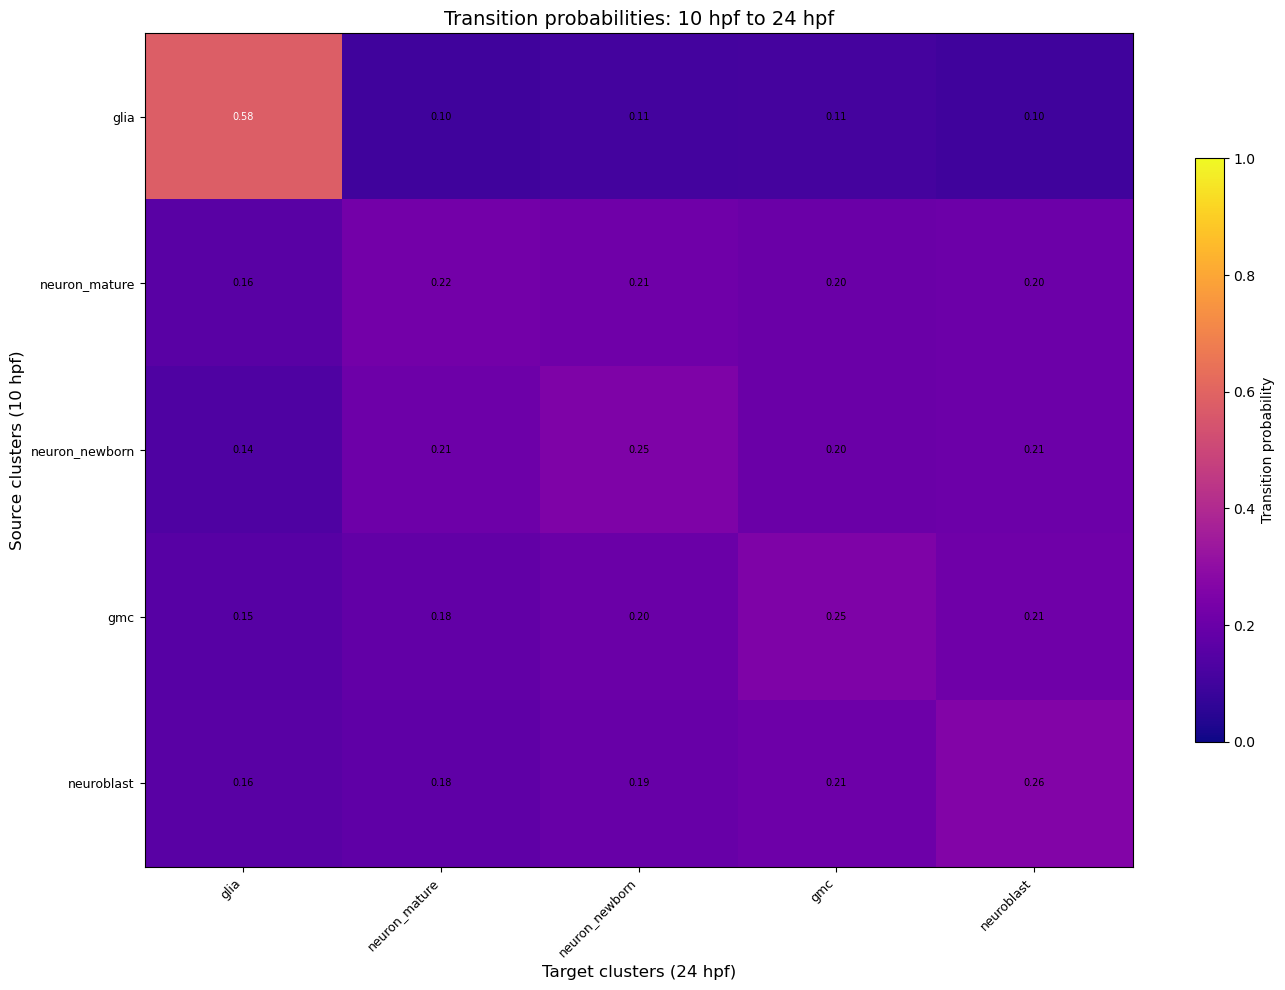

In [135]:
# Plotting the transition heatmap
transition_ordered = plot_transition_heatmap(
    transition_df, 
    source_time=10, 
    target_time=24,
    save_path='heat_map_transition_table_12_16.png'
)